# Distillation results

In [160]:
import joblib
from pathlib import Path
import pandas as pd

folder = "../results/"
paths = Path(folder).glob("**/*.joblib")
rs_df = pd.DataFrame()
for path in paths:
    with open(folder + path.name, "rb") as file:
        results = joblib.load(file)
    
    r_df = pd.DataFrame(results)
    s_parts = path.stem.split("_")
    r_df["exe"], r_df["alpha"], r_df["batch"] = s_parts[0], s_parts[1], s_parts[2] 
    rs_df = pd.concat([rs_df, r_df])

rs_df.head(5)

,epoch_loss_l,epoch_acc_l,epoch_acc_teacher_l,diff_t_s,exe,alpha,batch
0,3.132085,0.928105,0.934641,1.869138,v3,0,32
1,1.445188,0.928105,0.934641,0.948848,v3,0,32
2,2.891203,0.901961,0.934641,1.147910,v3,0,32
3,2.141499,0.928105,0.934641,1.433354,v3,0,32
4,2.593027,0.882353,0.934641,1.334483,v3,0,32


In [165]:
# Calculates means and strd
means = rs_df.groupby(["alpha"]).mean()
strd = rs_df.groupby(["alpha"]).std()

In [132]:
rs_df_m = rs_df.groupby(["alpha", "index"]).mean()
rs_df_d = rs_df.groupby(["alpha", "index"]).std()

rs_df_m.reset_index(inplace=True)
rs_df_d.reset_index(inplace=True)

## Aggregated plots

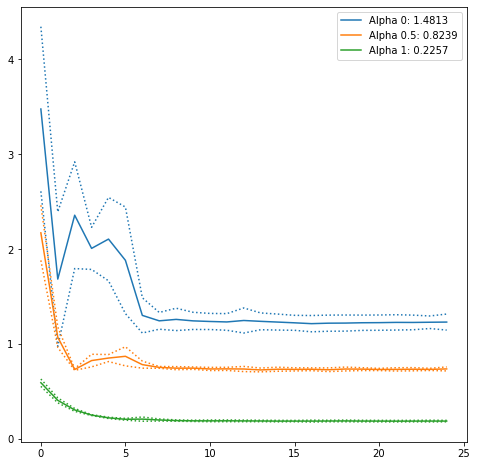

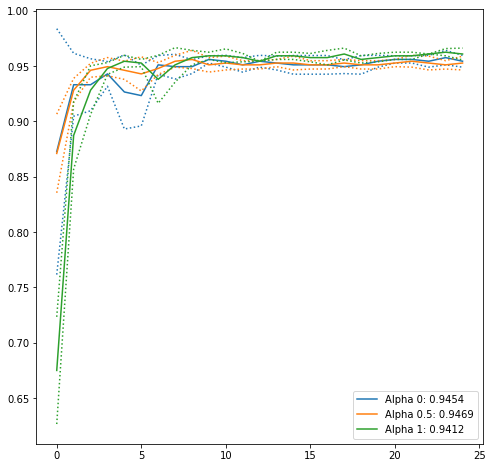

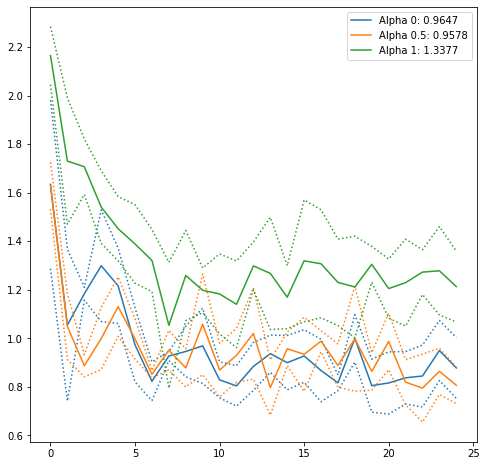

In [158]:
colors = {"0": '#1f77b4', "0.5": '#ff7f0e', "1": '#2ca02c'}
vars = ["epoch_loss_l",	"epoch_acc_l","diff_t_s"]

for var in vars:
    plt.figure(figsize=(8, 8))
    for t1, t2 in zip(rs_df_m.groupby("alpha"), rs_df_d.groupby("alpha")):
        alpha, data = t1
        _, data_d = t2
        value = round(means[means.index == alpha][var][0], 4)
        plt.plot(data["index"], data[var], color=colors[alpha], label="Alpha " + alpha + ": {}".format(value))
        plt.plot(data["index"], data[var] + data_d[var], ':', color=colors[alpha])
        plt.plot(data["index"], data[var] - data_d[var], ':', color=colors[alpha])
        plt.legend()


## No aggregated plots

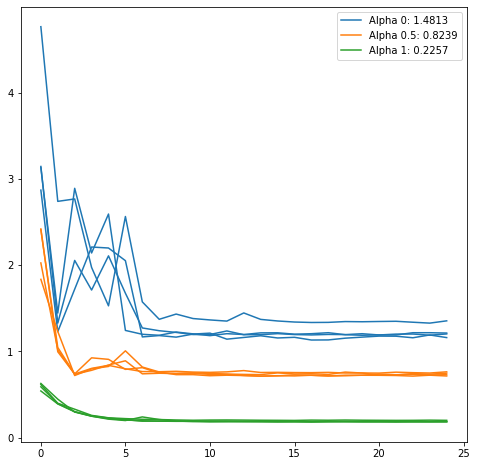

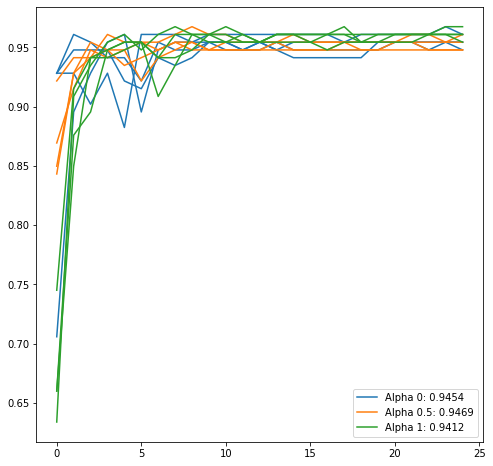

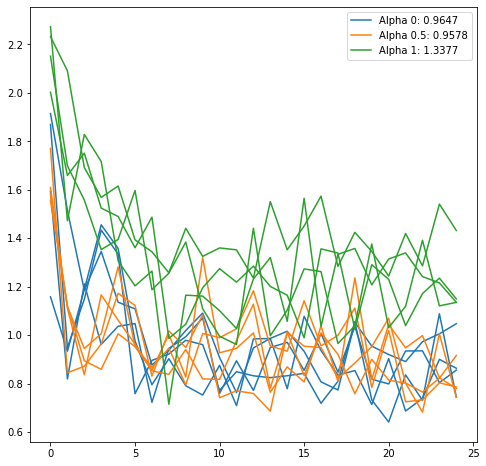

In [103]:
import matplotlib.pyplot as plt

vars = ["epoch_loss_l",	"epoch_acc_l","diff_t_s"]

for var in vars:
    plt.figure(figsize=(8, 8))
    gv = rs_df.groupby(["alpha", "exe"])
    colors = {"0": '#1f77b4', "0.5": '#ff7f0e', "1": '#2ca02c'}

    legend = []
    for i, data in gv:
        alpha = i[0]
        if alpha not in legend:
            value = round(means[means.index == alpha][var][0], 4)
            plt.plot(data[var], color=colors[alpha], label="Alpha " + alpha + ": {}".format(value))
            plt.legend()
            legend.append(alpha)
        else:
            plt.plot(data[var], color=colors[alpha])